1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import pandas as pd

In [6]:
q1 = pd.read_csv('q1.csv')
q1.size

200

In [11]:
sum(y)

13.677333280000004

In [5]:
y = q1.values[:, 1]
def pos(sigma):
    return np.exp(sigma*np.dot(y, y)/(2*(sigma + 1)) - sum(y)/2) / (sigma*(np.sqrt(2*np.pi * (sigma + 1)))**100)

NameError: name 'q1' is not defined

# 問題b

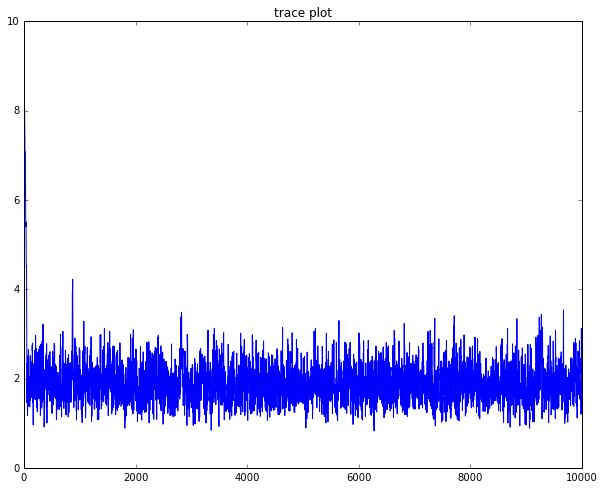

In [5]:
np.random.seed(1234)
samples = [10]
for i in range(10000):
    u = np.random.uniform()
    propose = samples[-1] + np.random.normal(scale = 0.5)
    prob = min(1, pos(propose)/pos(samples[-1]))
    
    if prob < u:
        samples.append(samples[-1])
    else:
        samples.append(propose)

plt.figure(figsize = (10, 8))
plt.title("trace plot")
plt.plot(samples)
plt.show()

In [7]:
y = q1.values[:, 1]
len(y)

100

# 問題c

In [8]:
def pos2(sigma, i):
    return np.exp(-np.dot(theta_sample[:, i], theta_sample[:, i])/(2*sigma)) / (sigma*(np.sqrt(2*np.pi * sigma))**100)

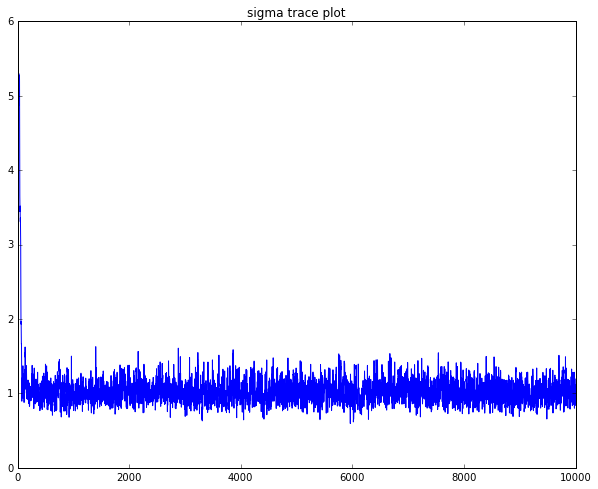

In [9]:
# Gibbs sampler
np.random.seed(1234)

sigma_sample = [5]
theta_sample = np.ones((len(y), 10000))

for i in range(10000):
    
    if i != 0:
        u = np.random.uniform()
        propose = sigma_sample[-1] + np.random.normal(scale = 0.2)
        prob = min(1, pos2(propose, i)/pos2(sigma_sample[-1], i))

        if prob < u:
            sigma_sample.append(sigma_sample[-1])
        else:
            sigma_sample.append(propose)
    
        for j in range(100):
            theta_sample[j, i] = np.random.normal(loc = sigma_sample[-1]*y[j]/(sigma_sample[-1] + 1), scale = np.sqrt(sigma_sample[-1]/(sigma_sample[-1] + 1)))

    else:
        for j in range(100):
            theta_sample[j, i] = np.random.normal(loc = sigma_sample[-1]*y[j]/(sigma_sample[-1] + 1), scale = np.sqrt(sigma_sample[-1]/(sigma_sample[-1] + 1)))

plt.figure(figsize = (10, 8))
plt.title("sigma trace plot")
plt.plot(sigma_sample)
plt.xlim((0, 10000))
plt.show()

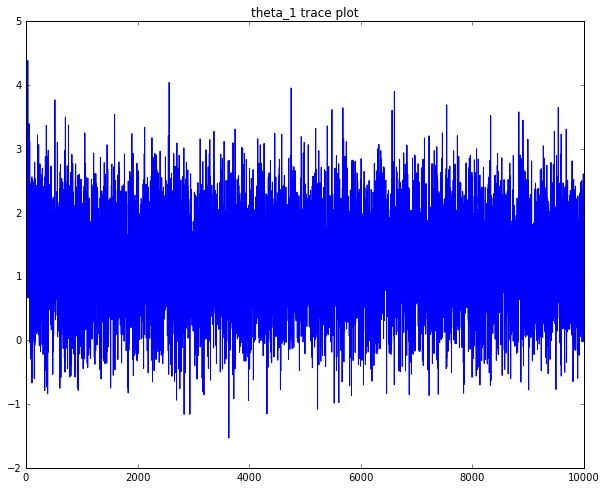

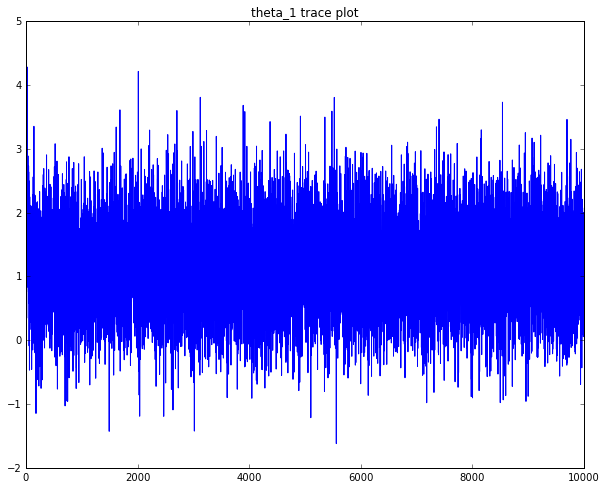

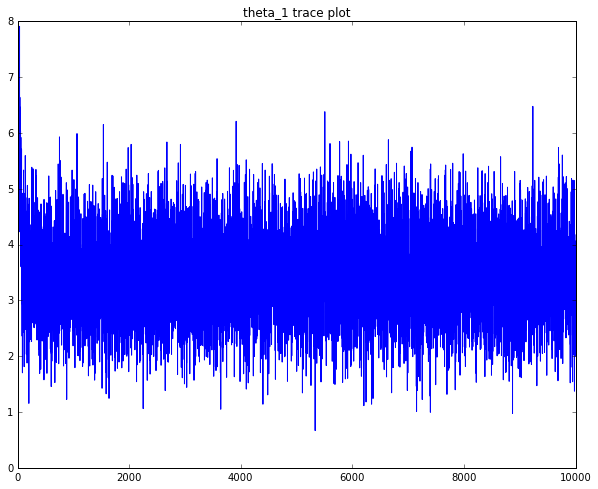

In [10]:
for i in range(3):
    plt.figure(figsize = (10, 8))
    plt.title("theta_1 trace plot")
    plt.plot(theta_sample[i, :])
    plt.xlim((0, 10000))
    plt.show()

# 問題2-c

In [11]:
q2 = pd.read_csv('q2.csv')
y = q2.values
np.shape(y)

(500, 3)

In [46]:
q2.head

<bound method NDFrame.head of        i  j         y
0      1  1  0.431133
1      1  2 -0.753560
2      1  3 -0.461019
3      1  4 -1.159021
4      1  5  1.136915
5      2  1 -0.510621
6      2  2 -0.956493
7      2  3 -1.897875
8      2  4 -1.270214
9      2  5 -0.547962
10     3  1  0.345436
11     3  2 -1.000526
12     3  3  0.803536
13     3  4 -1.176547
14     3  5 -3.511613
15     4  1 -0.553267
16     4  2 -2.706255
17     4  3 -1.069932
18     4  4 -1.076134
19     4  5 -0.268584
20     5  1  0.904580
21     5  2  0.689363
22     5  3 -1.259163
23     5  4 -0.607066
24     5  5  0.478237
25     6  1  0.908511
26     6  2  0.780625
27     6  3  0.398691
28     6  4 -2.005635
29     6  5  0.719542
..   ... ..       ...
470   95  1  0.942982
471   95  2 -0.863270
472   95  3 -0.922687
473   95  4  1.236043
474   95  5  1.141513
475   96  1 -1.167407
476   96  2 -0.468912
477   96  3 -1.045988
478   96  4  0.821754
479   96  5 -1.490476
480   97  1  0.468489
481   97  2  2.158297
48

In [59]:
summention = np.dot(np.reshape(y[:, 2], (100, 5)).sum(axis = 1), np.reshape(y[:, 2], (100, 5)).sum(axis = 1))
def pos3(sigma):
    return np.exp(summention*sigma/(2*(5*sigma + 1))) / (sigma*(sigma*5 + 1)**50)

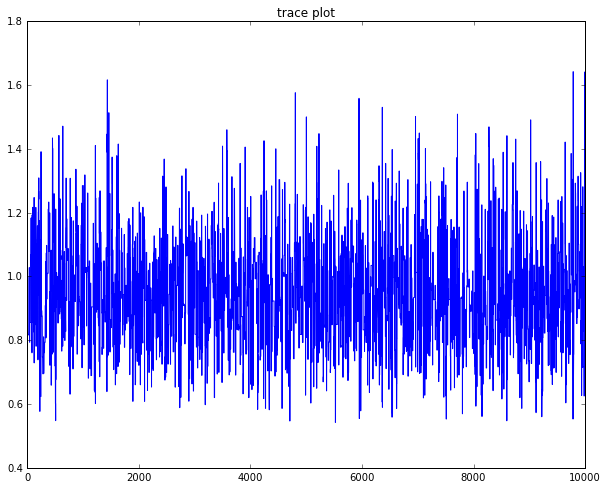

In [62]:
np.random.seed(1234)
samples = [1]
for i in range(10000):
    u = np.random.uniform()
    propose = samples[-1] + np.random.normal(scale = 1)
    prob = min(1, pos3(propose)/pos3(samples[-1]))
    
    if prob < u:
        samples.append(samples[-1])
    else:
        samples.append(propose)

plt.figure(figsize = (10, 8))
plt.title("trace plot")
plt.plot(samples)
plt.show()

# 問題2-d

In [12]:
def pos4(sigma, i):
    return np.exp(-np.dot(theta_sample[:, i], theta_sample[:, i])/(2*sigma))/(sigma*(2*np.pi*sigma)**50)

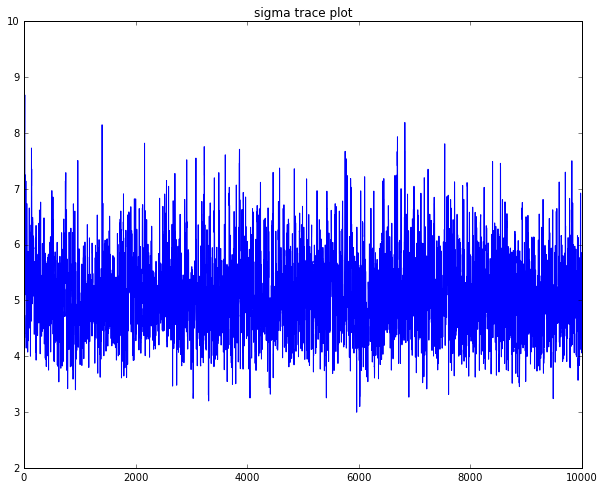

In [13]:
np.random.seed(1234)

sigma_sample = [10]
theta_sample = np.ones((len(y), 10000))

for i in range(10000):
    
    if i != 0:
        u = np.random.uniform()
        propose = sigma_sample[-1] + np.random.normal(scale = 1)
        prob = min(1, pos4(propose, i)/pos4(sigma_sample[-1], i))

        if prob < u:
            sigma_sample.append(sigma_sample[-1])
        else:
            sigma_sample.append(propose)
    
        for j in range(100):
            theta_sample[j, i] = np.random.normal(loc = sigma_sample[-1]*sum(y[j*5:j*5+5, 2])/(5*sigma_sample[-1] + 1), scale = np.sqrt(sigma_sample[-1]/(5*sigma_sample[-1] + 1)))

    else:
        for j in range(100):
            theta_sample[j, i] = np.random.normal(loc = sigma_sample[-1]*sum(y[j*5:j*5+5, 2])/(5*sigma_sample[-1] + 1), scale = np.sqrt(sigma_sample[-1]/(5*sigma_sample[-1] + 1)))

plt.figure(figsize = (10, 8))
plt.title("sigma trace plot")
plt.plot(sigma_sample)
plt.xlim((0, 10000))
plt.show()

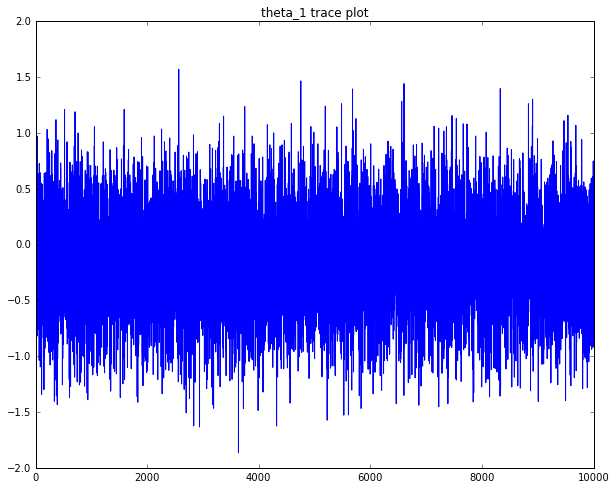

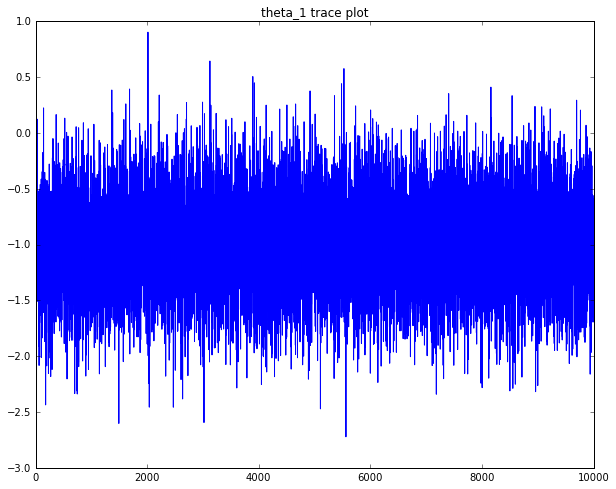

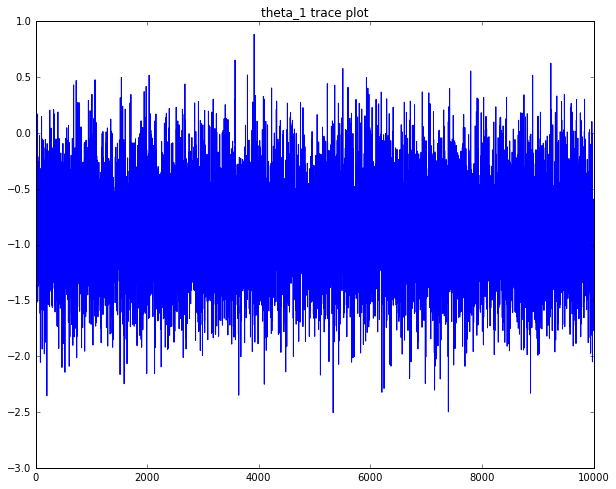

In [14]:
for i in range(3):
    plt.figure(figsize = (10, 8))
    plt.title("theta_1 trace plot")
    plt.plot(theta_sample[i, :])
    plt.xlim((0, 10000))
    plt.show()